In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

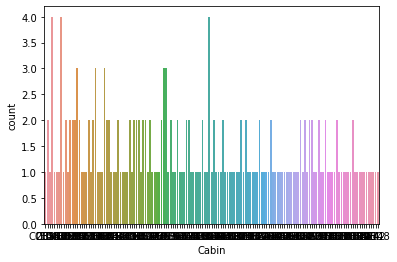

In [7]:
sns.countplot(df.Cabin)

In [8]:
df.drop(['PassengerId','Name','Embarked','Ticket'],axis=1,inplace=True)

In [9]:
cat_cols = df.select_dtypes(include=object).columns
cat_cols

Index(['Sex', 'Cabin'], dtype='object')

In [10]:
round(df.isnull().sum()/len(df)*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
dtype: float64

In [11]:
a=[]
for i in df.Cabin:
    i = str(i)
    for j in i:
        a.append(j)

a = pd.Series(a)
a.unique()

array(['n', 'a', 'C', '8', '5', '1', '2', '3', 'E', '4', '6', 'G', '0',
       'D', 'A', ' ', '7', 'B', 'F', '9', 'T'], dtype=object)

In [12]:
for i in df.Cabin:
    i = str(i)
    for j in i:
        df.Cabin = df.Cabin.str.replace(i,j)
        
df.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', '2', 'T'], dtype=object)

In [13]:
df.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', '2', 'T'], dtype=object)

In [14]:
df.Cabin = df.Cabin.replace('2',df.Cabin.mode()[0])
df.Cabin = df.Cabin.replace(np.nan,'0')

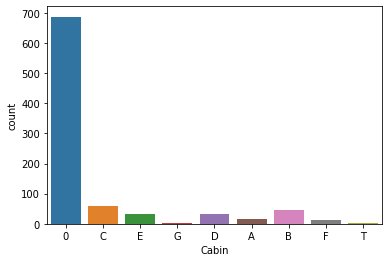

In [15]:
sns.countplot(df.Cabin)

We have replaced people with missing value for nan as 0 to check if they survived, if they didn't it means they didn't have a cabin.

In [16]:
df.Cabin.isnull().sum()

0

In [17]:
pd.crosstab(df['Cabin'],df['Survived'])

Survived,0,1
Cabin,,
0,481,206
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0


It appears most of the people who didn't have a cabin lost their lives.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
df['Fam'] = df['Parch']+df['SibSp']

In [20]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Here we can see that the 1st class passengers had more survival rate

In [21]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

In [22]:
pd.crosstab(df['Fam'],df['Survived'])

Survived,0,1
Fam,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Cabin       891 non-null object
Fam         891 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


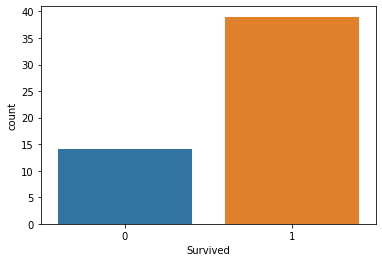

In [24]:
rich = df[df.Fare>100]
sns.countplot(rich.Survived)

Here we can see that the people who paid more than 100 as fare has higher chances of survival

In [25]:
cat_cols = df.select_dtypes(include=object)

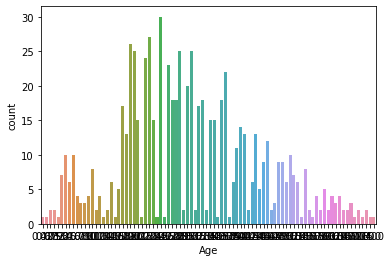

In [26]:
sns.countplot(df.Age)

In [27]:
df.Age = df.Age.replace(np.nan,df.Age.mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Fam         0
dtype: int64

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
ohe = OneHotEncoder()

In [31]:
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [32]:
test_df = pd.read_csv('test.csv')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y_train = df.Survived
X_train = df.drop('Survived',axis=1)
X_test = pd.read_csv('test.csv')

In [34]:
X_test.Age = X_test.Age.replace(np.nan,X_test.Age.mode()[0])
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
X_test['Fam'] = X_test['SibSp']+X_test['Parch']
X_test = X_test.drop(['SibSp','Parch'],axis=1)

In [36]:
X_test.Cabin = X_test.Cabin.replace(np.nan,'0')

In [37]:
X_test.Fare = X_test.Fare.replace(np.nan,X_test.Fare.mode()[0])

In [38]:
X_test.drop(['PassengerId','Name','Embarked'],axis=1,inplace= True)

In [39]:
X_test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Fam
0,3,male,34.5,330911,7.8292,0,0
1,3,female,47.0,363272,7.0000,0,1
2,2,male,62.0,240276,9.6875,0,0
3,3,male,27.0,315154,8.6625,0,0
4,3,female,22.0,3101298,12.2875,0,2


In [40]:
X_test.isnull().sum()

Pclass    0
Sex       0
Age       0
Ticket    0
Fare      0
Cabin     0
Fam       0
dtype: int64

In [41]:
X_test.drop('Ticket',axis=1,inplace=True)

In [42]:
cats = X_test.select_dtypes(include = object)

In [43]:
X_test.head()

,Pclass,Sex,Age,Fare,Cabin,Fam
0,3,male,34.5,7.8292,0,0
1,3,female,47.0,7.0000,0,1
2,2,male,62.0,9.6875,0,0
3,3,male,27.0,8.6625,0,0
4,3,female,22.0,12.2875,0,2


In [44]:
for i in cats:
    X_test[i] = le.fit_transform(X_test[i])

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [46]:
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

81.14

In [54]:
X_train.shape

(891, 6)

In [47]:

from sklearn.feature_selection import VarianceThreshold

sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
print(X_train_remove_variance.shape)


(891, 6)


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [60]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [67]:
model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)

In [68]:
acc_grad = round(model.score(X_train,y_train)*100,2)
acc_grad

94.28

In [57]:
y_test = y_pred

In [61]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve


algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1),
        'Naive Bayes': GaussianNB(),
        'K Nearest Neighbors': KNeighborsClassifier(),
        'Ada Boost':AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=100,random_state=1),
        'XG Boost':XGBClassifier(learning_rate=0.5,random_state=1,n_jobs=-1),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.5,random_state=1),
        'Bagging':BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
       }

.0

for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(k,':\n')
    print("Accuracy train = " , model.score(X_train,y_train))
    print("Accuracy test = " , accuracy_score(y_test,y_pred))
    print("Precision = " ,precision_score(y_test,y_pred))
    print("Recall = " ,recall_score(y_test,y_pred))
    print('')
    print("F1 Score = " ,f1_score(y_test,y_pred))
    print('Roc-Auc score = ',roc_auc_score(y_test,y_pred))
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n',classification_report(y_test,y_pred))
    print('')
    print('____________________________________________________________________________________________________')

Logistic Regression :

Accuracy train =  0.8114478114478114
Accuracy test =  1.0
Precision =  1.0
Recall =  1.0

F1 Score =  1.0
Roc-Auc score =  1.0
Confusion matrix: 
[[232   0]
 [  0 186]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       186

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418


____________________________________________________________________________________________________
Decision Tree :

Accuracy train =  0.9854096520763187
Accuracy test =  0.7511961722488039
Precision =  0.75625
Recall =  0.6505376344086021

F1 Score =  0.6994219653179191
Roc-Auc score =  0.74121709306637
Confusion matrix: 
[[193  39]
 [ 65 121]]

               precision    recall  f1-score   support

           0       0.75      0.83      0.79       232
           1      

In [69]:
df = pd.read_csv('test.csv')

In [70]:
submission = pd.DataFrame({"PassengerId": df["PassengerId"],"Survived": y_pred})

In [71]:
submission.to_csv('subbag.csv')